In [230]:
# Importing the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [231]:
# Reading the data
dataset=pd.read_csv("churnData.csv")
df=dataset
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [232]:
df.shape

(7043, 21)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [234]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [235]:
# Converting Total Charges to a numeric data type.
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [236]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [237]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [238]:
# Removing missing values
df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [239]:
df = df.drop('customerID', axis=1)

In [240]:
# Converting categorical varible to numerical type
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
le.fit(df[['Churn']])
df['Churn']=le.transform(df[['Churn']])

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Data Exploration

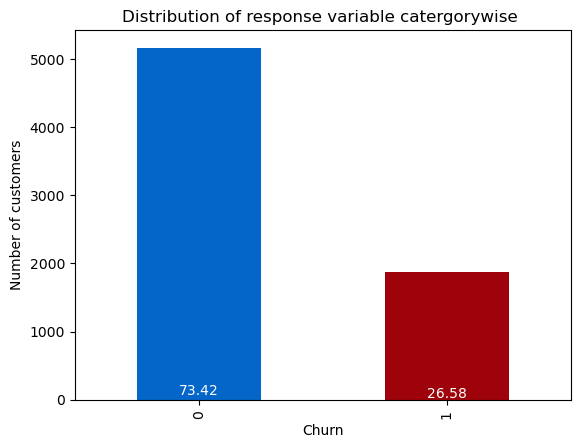

In [188]:
count=df1['Churn'].value_counts()
churnPct=(df1['Churn'].value_counts()/len(df1))*100
churnPct
df['Churn'].value_counts().plot(kind='bar', color=['#0466c8', '#9e020a'])
plt.title("Distribution of response variable catergorywise ")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
for index,value in enumerate(churnPct):
    plt.text(x=index,y=value,s=round(value,2),ha='center',color="white")
plt.show()
    

In [189]:
# fig, ax = plt.subplots()
# bars = ax.barh(indexes, values)

# ax.bar_label(bars)

<AxesSubplot:>

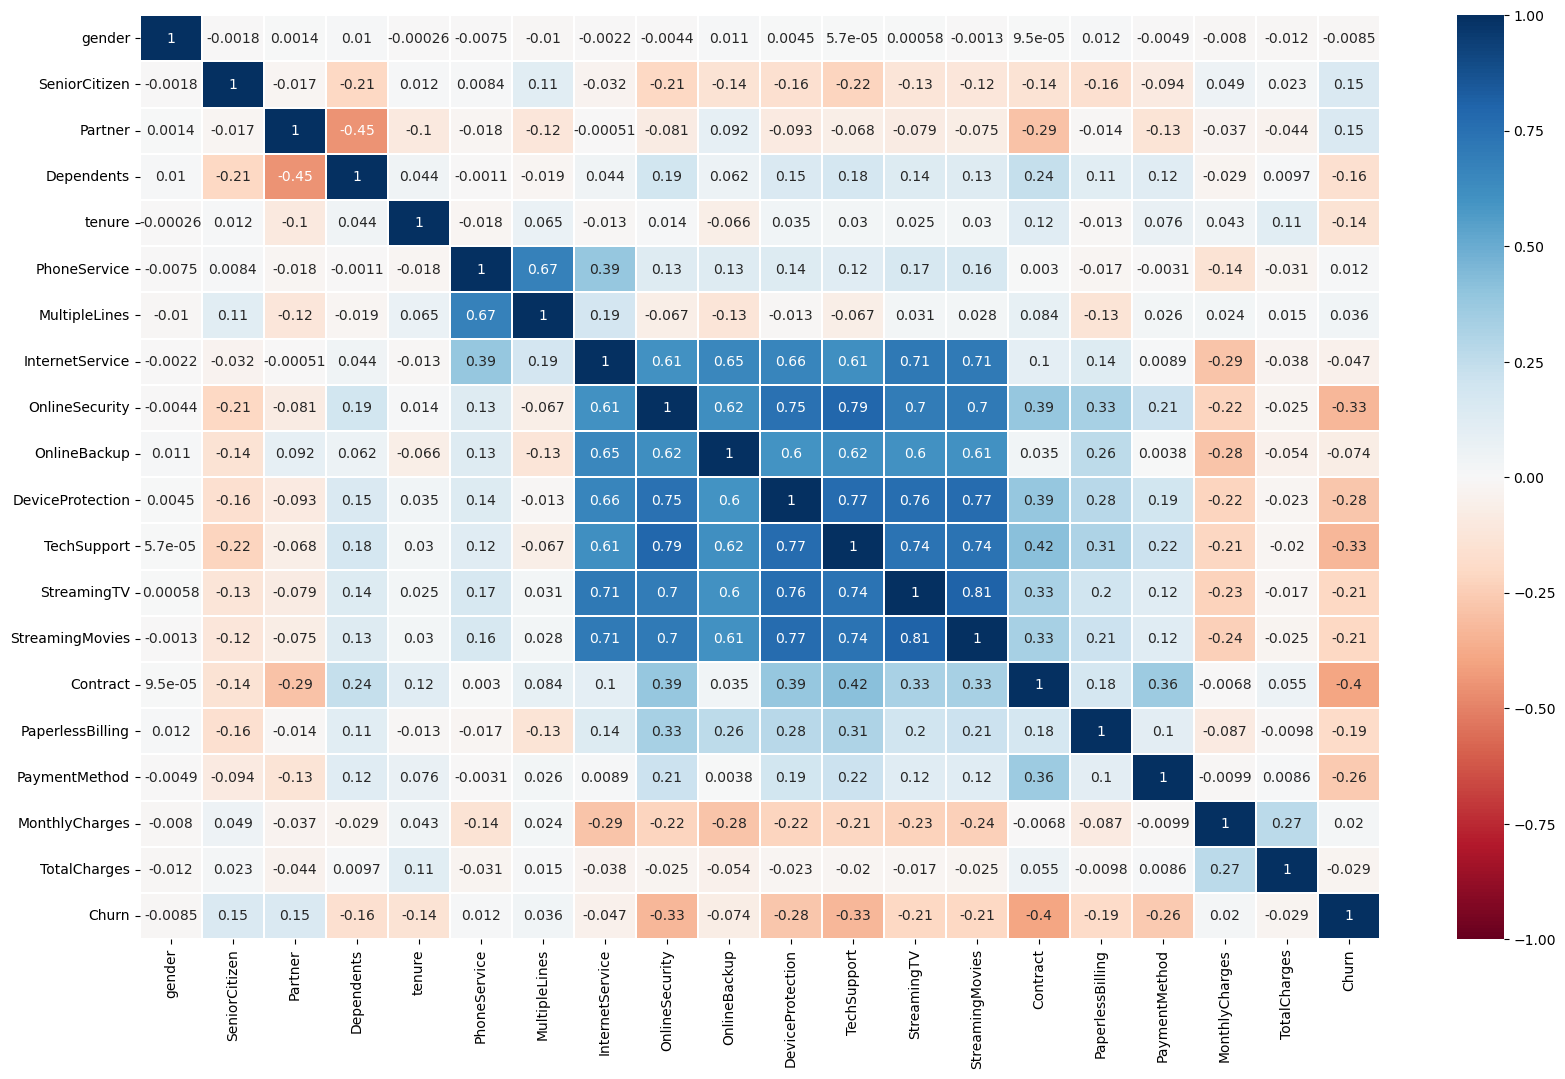

In [190]:
plt.figure(figsize=(20, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths=.2, annot = True, cmap="RdBu",vmin=-1, vmax=1)
# Gender, Phone service, Multiple lines, Internet Service, Online Backup

<AxesSubplot:>

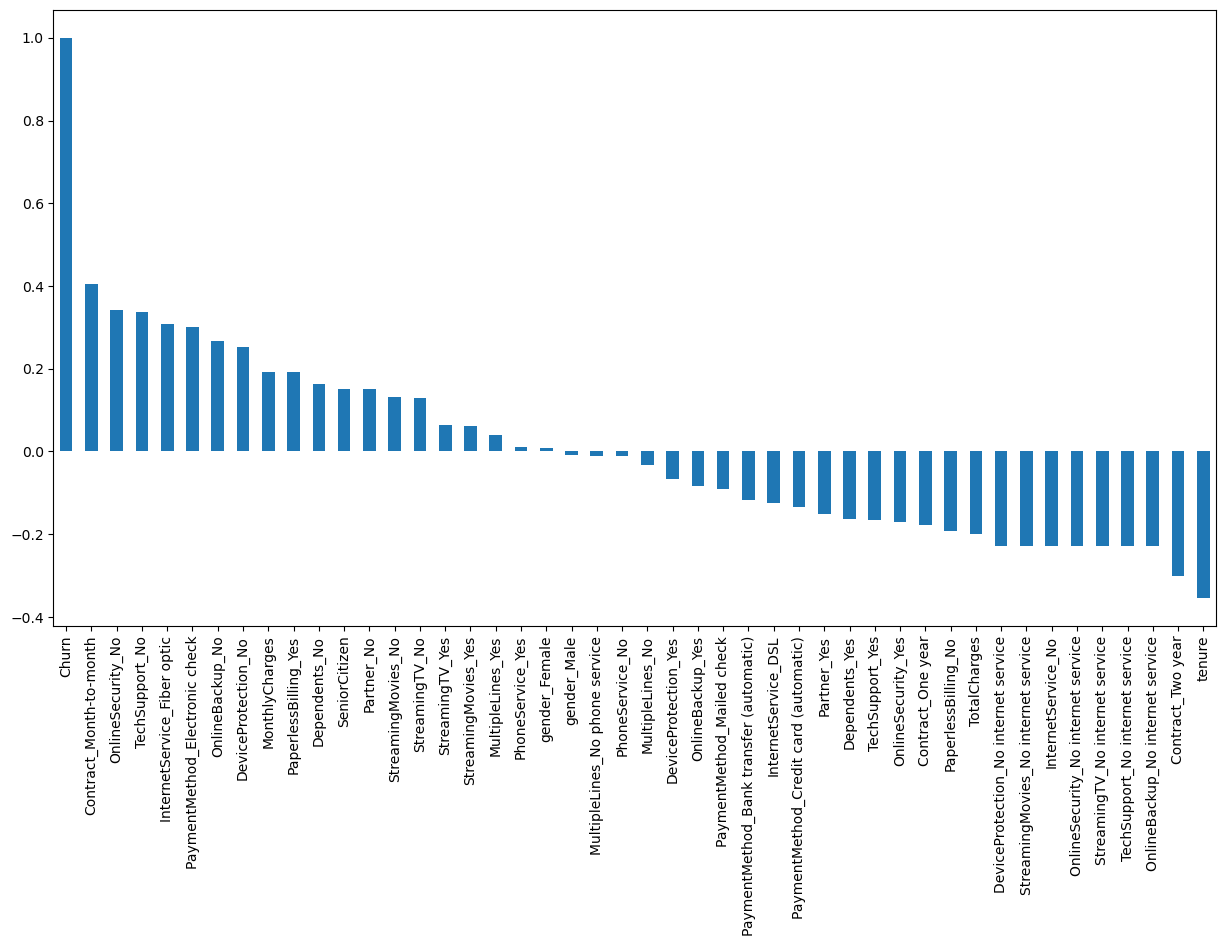

In [191]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

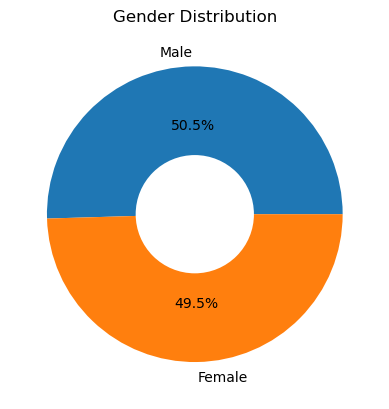

In [192]:
genders=df['gender'].value_counts()
plt.title("Gender Distribution")
plt.pie(genders, labels = ['Male','Female'],autopct='%1.1f%%')

# Drawing the circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

([<matplotlib.patches.Wedge at 0x255ae5de5b0>,
 [Text(-0.9599135988488141, 0.5371832859882352, 'Not Senior Citizen'),
  Text(0.9599135485540808, -0.5371833758618302, 'Senior Citizen')],
 [Text(-0.5235892357357167, 0.29300906508449187, '83.8%'),
  Text(0.5235892083022259, -0.2930091141064528, '16.2%')])

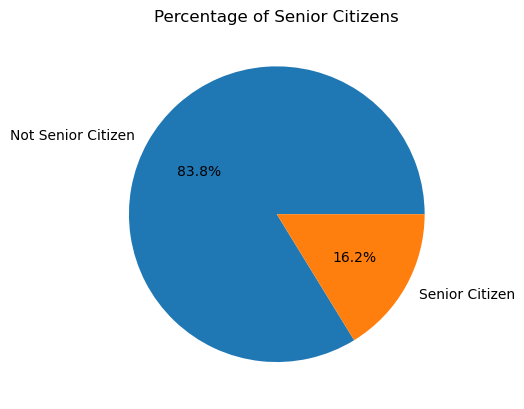

In [193]:
senior=df['SeniorCitizen'].value_counts()
plt.title("Percentage of Senior Citizens")
plt.pie(senior,labels = ['Not Senior Citizen','Senior Citizen'],autopct='%1.1f%%')
# only 16.2% customers are senior citizens and 83.8% customers are young people

<AxesSubplot:xlabel='Dependents', ylabel='count'>

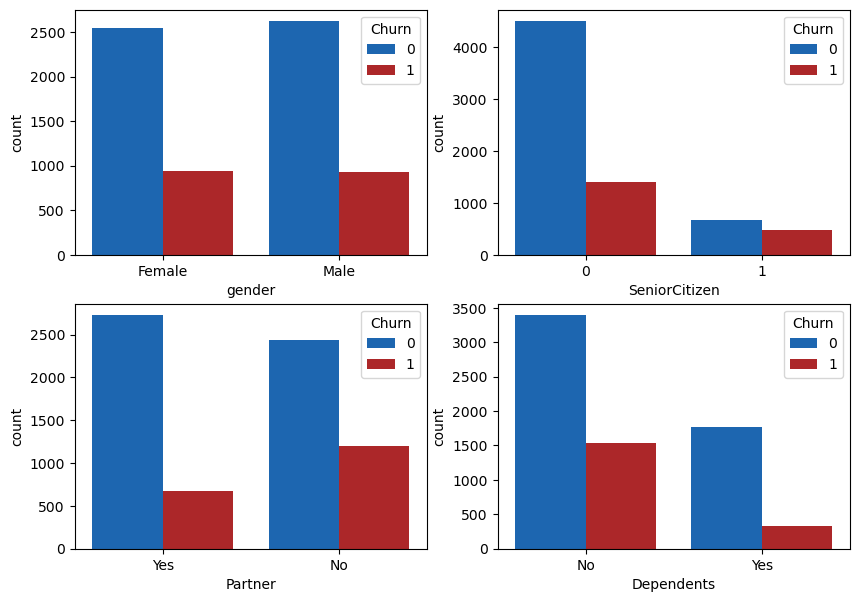

In [194]:
fig, axes = plt.subplots(2,2, figsize=(10,7))
sns.countplot(data=df,x='gender', hue='Churn', ax=axes[0,0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='SeniorCitizen', hue='Churn', ax=axes[0,1],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='Partner', hue='Churn', ax=axes[1,0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='Dependents', hue='Churn', ax=axes[1,1],palette=["#0466c8", "#c21114"])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

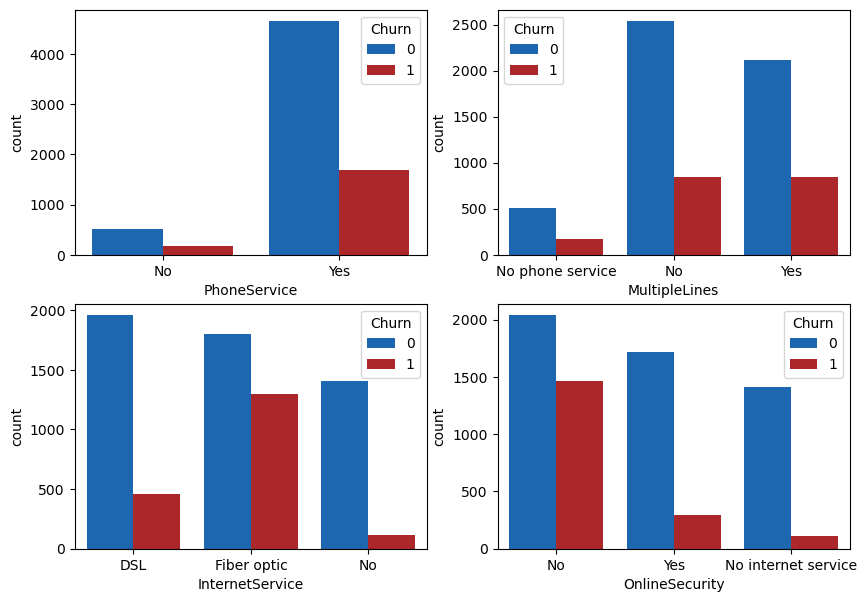

In [195]:
fig, axes = plt.subplots(2,2, figsize=(10,7))
sns.countplot(data=df,x='PhoneService', hue='Churn', ax=axes[0,0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='MultipleLines', hue='Churn', ax=axes[0,1],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='InternetService', hue='Churn', ax=axes[1,0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='OnlineSecurity', hue='Churn', ax=axes[1,1],palette=["#0466c8", "#c21114"])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

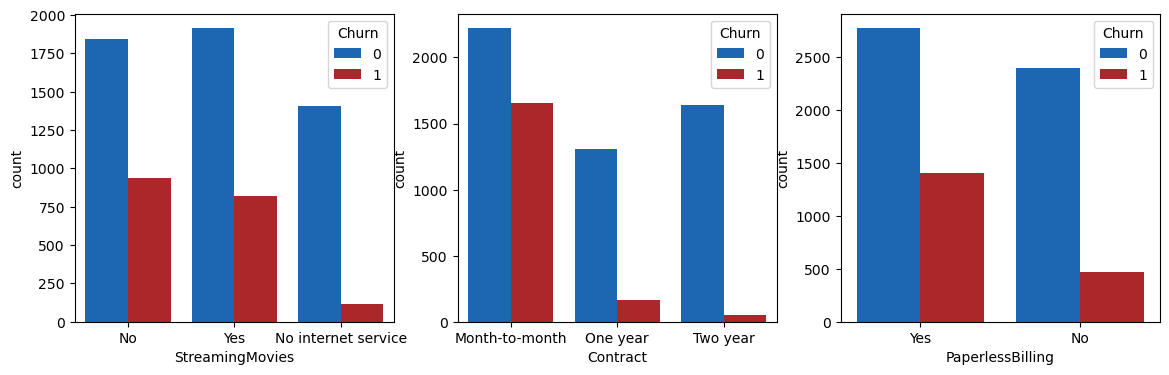

In [196]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
sns.countplot(data=df,x='StreamingMovies', hue='Churn', ax=axes[0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='Contract', hue='Churn', ax=axes[1],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='PaperlessBilling', hue='Churn', ax=axes[2],palette=["#0466c8", "#c21114"])
# sns.countplot(data=df,x='PaymentMethod', hue='Churn', ax=axes[1,1],palette=["#0466c8", "#c21114"])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

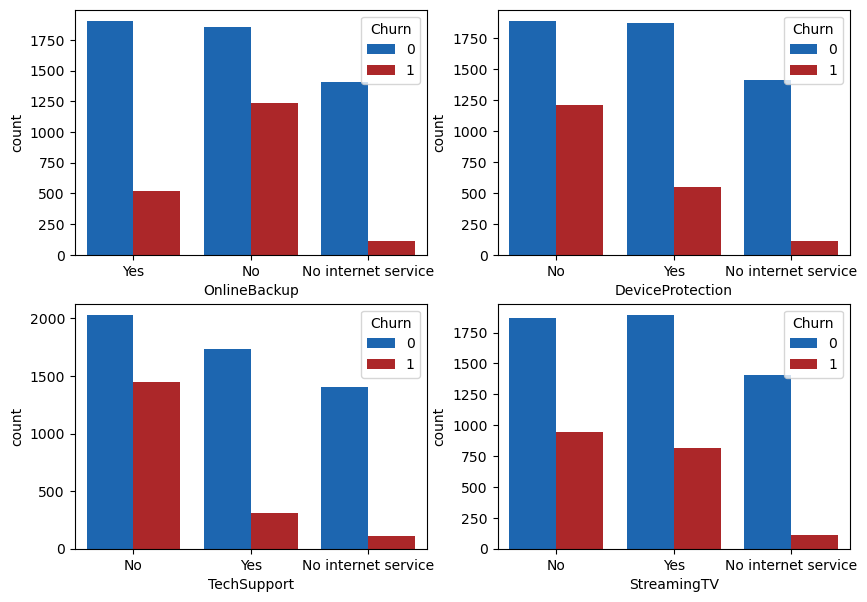

In [197]:
fig, axes = plt.subplots(2,2, figsize=(10,7))
sns.countplot(data=df,x='OnlineBackup', hue='Churn', ax=axes[0,0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='DeviceProtection', hue='Churn', ax=axes[0,1],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='TechSupport', hue='Churn', ax=axes[1,0],palette=["#0466c8", "#c21114"])
sns.countplot(data=df,x='StreamingTV', hue='Churn', ax=axes[1,1],palette=["#0466c8", "#c21114"])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

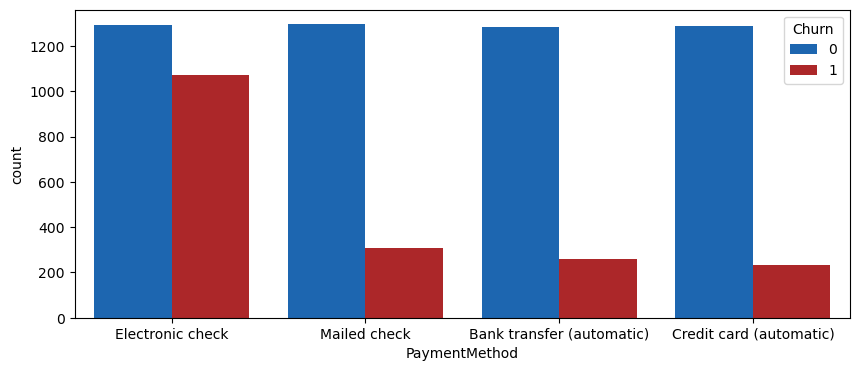

In [198]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='PaymentMethod', hue='Churn', palette= ["#0466c8","#c21114"])


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

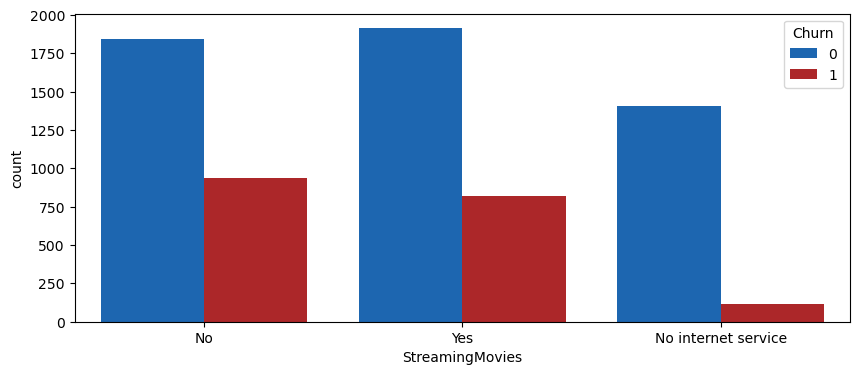

In [199]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='StreamingMovies', hue='Churn', palette= ["#0466c8","#c21114"])

Text(0.5, 1.0, 'Effect of monthly charge values on churn')

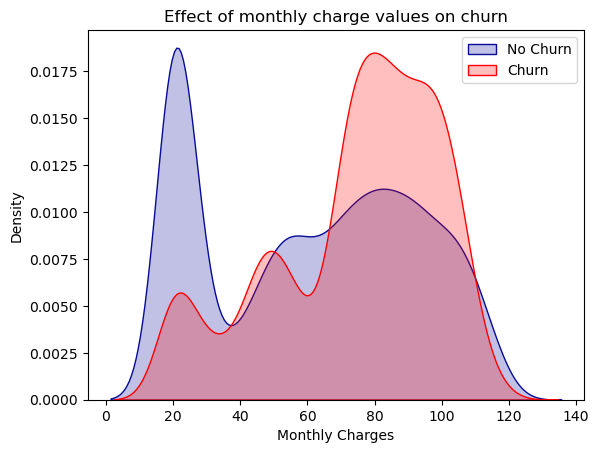

In [200]:


fig=sns.kdeplot(df1.MonthlyCharges[(df["Churn"] == 0) ],
                color="#060b99", shade = True)
fig=sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
                ax =fig, color="red", shade= True)
fig.legend(["No Churn","Churn"],loc='upper right')
fig.set_ylabel('Density')
fig.set_xlabel('Monthly Charges')
fig.set_title('Effect of monthly charge values on churn')
# Churn rate tend to be high when the monthly charges are higher

Text(0.5, 1.0, 'Effect of total charge values on churn')

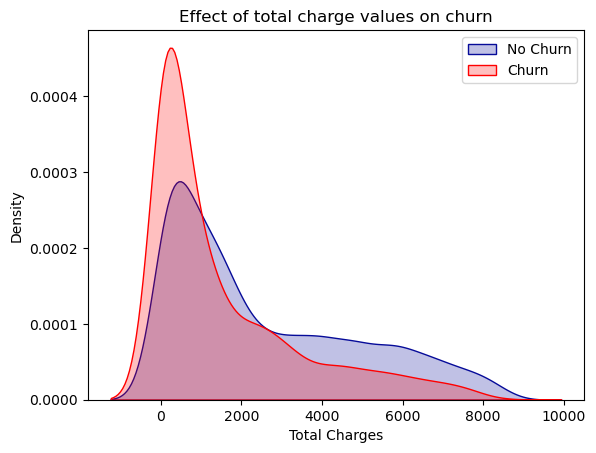

In [201]:
fig=sns.kdeplot(df1.TotalCharges[(df["Churn"] == 0) ],
                color="#060b99", shade = True)
fig=sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =fig, color="red", shade= True)
fig.legend(["No Churn","Churn"],loc='upper right')
fig.set_ylabel('Density')
fig.set_xlabel('Total Charges')
fig.set_title('Effect of total charge values on churn')
# Higher Churning at Lower total charges

Text(0.5, 1.0, 'Relationship between Monthly Charges and Total Charges')

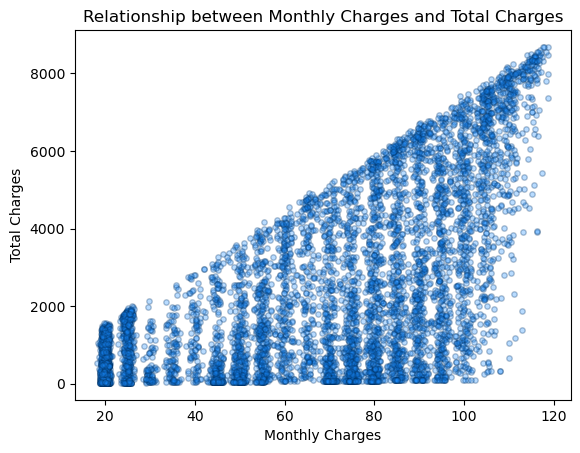

In [202]:
plt.scatter(df['MonthlyCharges'],df['TotalCharges'],color="#1a8cff",alpha=0.3,s=15,edgecolors='#003366')
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.title("Relationship between Monthly Charges and Total Charges")
# As the monthly charges increases the total charges also tend to increase

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

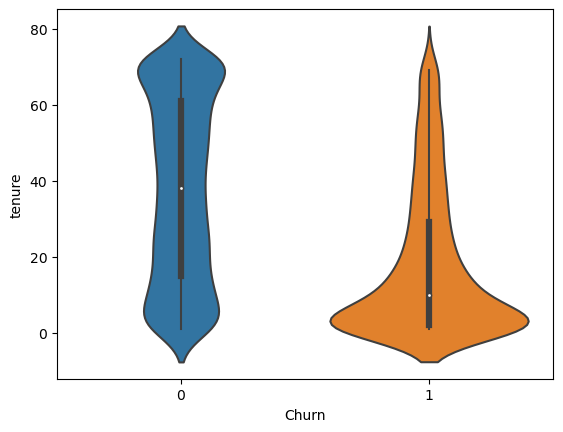

In [203]:
# sns.boxplot(x = df.Churn, y = df.tenure)
sns.violinplot(data=df, x='Churn', y='tenure')


C:\Users\akshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

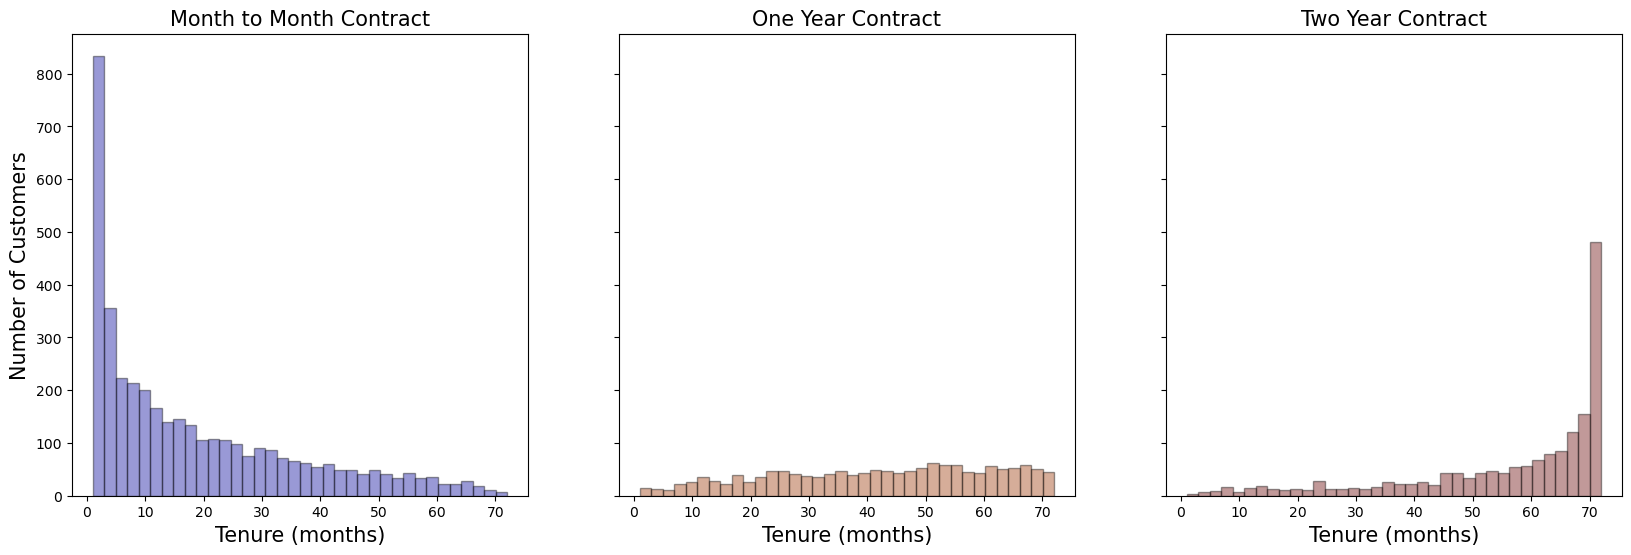

In [204]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = '#000099',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers',size = 15)
ax.set_xlabel('Tenure (months)',size = 15)
ax.set_title('Month to Month Contract',size = 15)

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = '#993300',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 15)
ax.set_title('One Year Contract',size = 15)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = '#660000',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 15)
ax.set_title('Two Year Contract',size = 15)

In [205]:
X = df.drop(columns='Churn')
Y = df['Churn']

Label Encoding

In [241]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [242]:
# Converting Payment method 'electronic check' =1 and remaining type to 0

df['PaymentMethod'].replace(to_replace='Electronic check', value=1, inplace=True)
df['PaymentMethod'].replace(to_replace='Mailed check', value=0, inplace=True)
df['PaymentMethod'].replace(to_replace='Bank transfer (automatic)', value=0, inplace=True)
df['PaymentMethod'].replace(to_replace='Credit card (automatic)', value=0, inplace=True)


In [243]:
df['Contract'].replace(to_replace='Month-to-month', value=1, inplace=True)
df['Contract'].replace(to_replace='One year', value=0, inplace=True)
df['Contract'].replace(to_replace='Two year', value=0, inplace=True)

df['InternetService'].replace(to_replace='Fiber optic', value=1, inplace=True)
df['InternetService'].replace(to_replace='DSL', value=0, inplace=True)
df['InternetService'].replace(to_replace='No', value=0, inplace=True)

df['OnlineSecurity'].replace(to_replace='No', value=1, inplace=True)
df['OnlineSecurity'].replace(to_replace='Yes', value=0, inplace=True)
df['OnlineSecurity'].replace(to_replace='No internet service', value=0, inplace=True)

df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
df['Partner'].replace(to_replace='No', value=0, inplace=True)

df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
df['Dependents'].replace(to_replace='No', value=0, inplace=True)

df['PaperlessBilling'].replace(to_replace='Yes', value=1, inplace=True)
df['PaperlessBilling'].replace(to_replace='No', value=0, inplace=True)

df['DeviceProtection'].replace(to_replace='No', value=1, inplace=True)
df['DeviceProtection'].replace(to_replace='Yes', value=0, inplace=True)
df['DeviceProtection'].replace(to_replace='No internet service', value=0, inplace=True)

df['OnlineBackup'].replace(to_replace='No', value=1, inplace=True)
df['OnlineBackup'].replace(to_replace='Yes', value=0, inplace=True)
df['OnlineBackup'].replace(to_replace='No internet service', value=0, inplace=True)

df['TechSupport'].replace(to_replace='No', value=1, inplace=True)
df['TechSupport'].replace(to_replace='Yes', value=0, inplace=True)
df['TechSupport'].replace(to_replace='No internet service', value=0, inplace=True)

df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,No phone service,0,1,0,1,1,No,No,1,1,1,29.85,29.85,0
1,Male,0,0,0,34,Yes,No,0,0,1,0,1,No,No,0,0,0,56.95,1889.50,0
2,Male,0,0,0,2,Yes,No,0,0,0,1,1,No,No,1,1,0,53.85,108.15,1
3,Male,0,0,0,45,No,No phone service,0,0,1,0,0,No,No,0,0,0,42.30,1840.75,0
4,Female,0,0,0,2,Yes,No,1,1,1,1,1,No,No,1,1,1,70.70,151.65,1


In [244]:
df_final = df.drop(columns=['gender', 'PhoneService','MultipleLines','StreamingTV','StreamingMovies'])

In [245]:
df_final.head(3)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,1,1,1,1,1,29.85,29.85,0
1,0,0,0,34,0,0,1,0,1,0,0,0,56.95,1889.50,0
2,0,0,0,2,0,0,0,1,1,1,1,0,53.85,108.15,1


In [246]:
from sklearn.model_selection import train_test_split
predictors = df_final.drop(columns=['Churn'])
response = df_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.3, random_state=37)

In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [248]:
# logistic Regression with imbalance dataset
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# make predictions on the test data
y_pred = model1.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification report of Logistic Regression with imbalance data :\n {classification_report(y_pred, y_test)}')


Classification report of Logistic Regression with imbalance data :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1666
           1       0.51      0.65      0.57       444

    accuracy                           0.79      2110
   macro avg       0.70      0.74      0.72      2110
weighted avg       0.82      0.79      0.80      2110



In [249]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)
# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)

# 500, 50, 30
print(f'Classification report for Random forest classifier with imbalanced data :\n {classification_report(y_pred, y_test)}')
print('-'*60)



0.7976303317535545
------------------------------------------------------------
Classification report for Random forest classifier with imbalanced data :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1666
           1       0.51      0.65      0.57       444

    accuracy                           0.79      2110
   macro avg       0.70      0.74      0.72      2110
weighted avg       0.82      0.79      0.80      2110

------------------------------------------------------------


In [250]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [251]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
X_train_st,y_train_st = smote.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 3622, 1: 1300})
The number of classes after fit Counter({0: 3622, 1: 3622})


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X_train_st, y_train_st, test_size=0.3)

Accuracy: 0.7483900643974241
Classification report of Logistic Regression with balance data :
               precision    recall  f1-score   support

           0       0.68      0.80      0.74       955
           1       0.82      0.71      0.76      1219

    accuracy                           0.75      2174
   macro avg       0.75      0.75      0.75      2174
weighted avg       0.76      0.75      0.75      2174



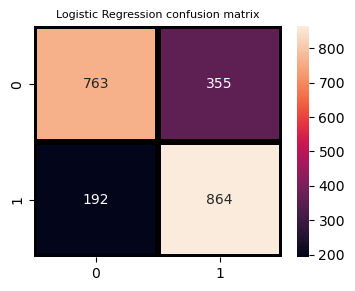

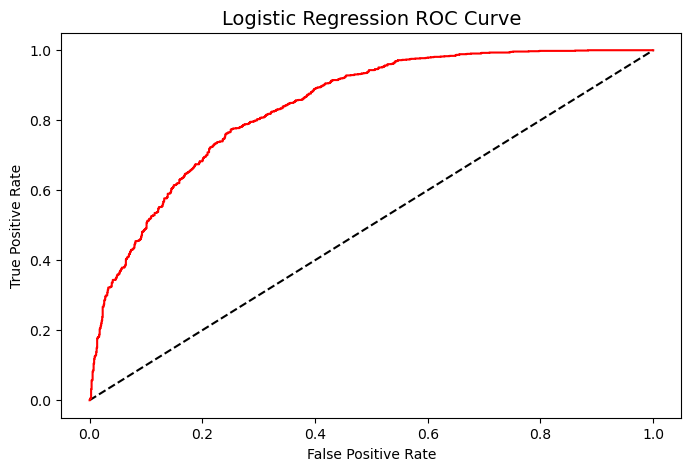

In [253]:
# logistic Regression with imbalance dataset
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# make predictions on the test data
y_pred = model1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

# Calculate sensitivity (true positive rate)
log_accuracy = accuracy_score(y_test, y_pred)
sensitivity = TP / (TP + FN)
log_recall = TP / (TP + FN)
log_precision = TP / (TP + FP)
log_f1 = 2 * (log_precision * log_recall) / (log_precision + log_recall)

# calculate the accuracy of the model
log_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", log_accuracy)
print(f'Classification report of Logistic Regression with balance data :\n {classification_report(y_pred, y_test)}')

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression confusion matrix",fontsize=8)
plt.show()

y_rfpred_prob = model1.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=14)
plt.show()

------------------------------------------------------------
Classification report for SVC with balanced data :
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      1118
           1       0.63      0.57      0.60      1056

    accuracy                           0.63      2174
   macro avg       0.63      0.63      0.63      2174
weighted avg       0.63      0.63      0.63      2174

------------------------------------------------------------


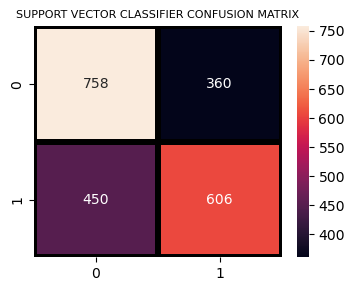

In [254]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)

cm = confusion_matrix(y_test, predict_y)

# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

# Calculate sensitivity (true positive rate)
svm_accuracy = accuracy_score(y_test, predict_y)
sensitivity = TP / (TP + FN)
svm_recall = TP / (TP + FN)
svm_precision = TP / (TP + FP)
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)


print('-'*60)
print(f'Classification report for SVC with balanced data :\n {classification_report(y_test,predict_y)}')
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=8)
plt.show()


Accuracy score : 0.7603495860165593
Classification report for Decision Tree with balanced data :
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      1118
           1       0.72      0.82      0.77      1056

    accuracy                           0.76      2174
   macro avg       0.76      0.76      0.76      2174
weighted avg       0.77      0.76      0.76      2174



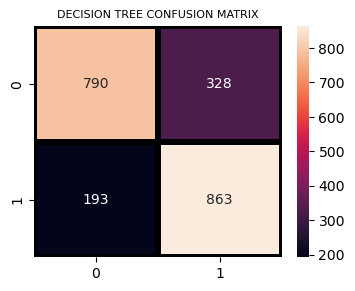

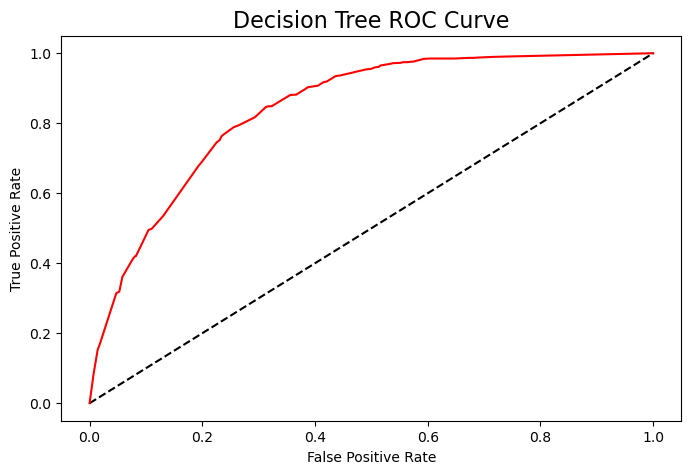

In [255]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train, y_train)
y_pred = Dtc_sampling.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_test,y_pred)}')

print(f'Classification report for Decision Tree with balanced data :\n {classification_report(y_test,y_pred)}')

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=8)
plt.show()

y_rfpred_prob = Dtc_sampling.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Decision Tree',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=16)
plt.show()


cm = confusion_matrix(y_test, y_pred)

# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

# Calculate sensitivity (true positive rate)
dtree_accuracy = accuracy_score(y_test, y_pred)
sensitivity = TP / (TP + FN)
dtree_recall = TP / (TP + FN)
dtree_precision = TP / (TP + FP)
dtree_f1 = 2 * (dtree_precision * dtree_recall) / (dtree_precision + dtree_recall)

0.7635694572217111
------------------------------------------------------------
Classification report for Random forest classifier with balanced data :
               precision    recall  f1-score   support

           0       0.71      0.80      0.76       994
           1       0.82      0.73      0.77      1180

    accuracy                           0.76      2174
   macro avg       0.77      0.77      0.76      2174
weighted avg       0.77      0.76      0.76      2174

------------------------------------------------------------


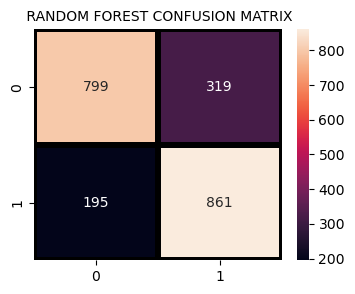

------------------------------------------------------------


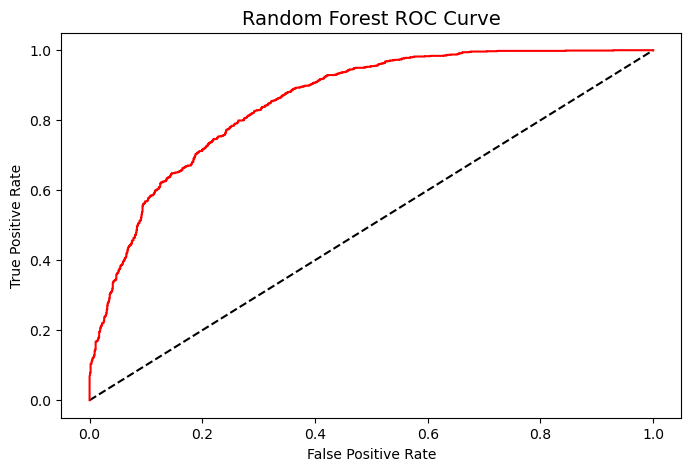

In [256]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)
# Make predictions
y_pred = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))
print('-'*60)

# 500, 50, 30
print(f'Classification report for Random forest classifier with balanced data :\n {classification_report(y_pred, y_test)}')
print('-'*60)

cm = confusion_matrix(y_test, y_pred)

# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

# Calculate sensitivity (true positive rate)
rf_accuracy = accuracy_score(y_test, y_pred)
sensitivity = TP / (TP + FN)
rf_recall = TP / (TP + FN)
rf_precision = TP / (TP + FP)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)

    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=10)
plt.show()
print('-'*60)

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=14)
plt.show()

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


------------------------------------------------------------
Classification report for KNN classifier with balanced data :
               precision    recall  f1-score   support

           0       0.81      0.69      0.75      1118
           1       0.72      0.82      0.77      1056

    accuracy                           0.76      2174
   macro avg       0.76      0.76      0.76      2174
weighted avg       0.76      0.76      0.76      2174

------------------------------------------------------------


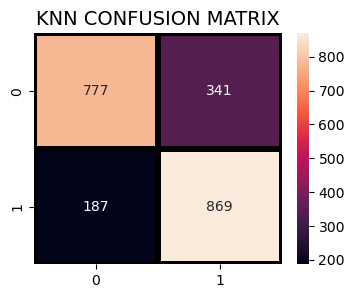

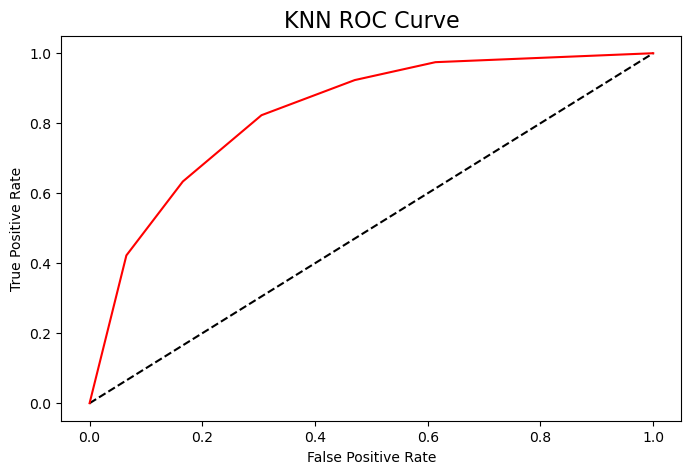

In [257]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the data
knn.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = knn.predict(X_test)

print('-'*60)

cm = confusion_matrix(y_test, y_pred)

# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

# Calculate sensitivity (true positive rate)
knn_accuracy = accuracy_score(y_test, y_pred)
sensitivity = TP / (TP + FN)
knn_recall = TP / (TP + FN)
knn_precision = TP / (TP + FP)
knn_f1 = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)

# 500, 50, 30

print(f'Classification report for KNN classifier with balanced data :\n {classification_report( y_test,y_pred)}')
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
      
plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.show()

y_rfpred_prob = knn.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=16)
plt.show()

In [258]:
accuracy = [log_accuracy, svm_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy]
recall = [log_recall, svm_recall, dtree_recall, rf_recall, knn_recall]
precision = [log_precision, svm_precision, dtree_precision, rf_precision, knn_precision]
f1 = [log_f1, svm_f1, dtree_f1, rf_f1, knn_f1]



In [259]:
data = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

In [260]:
Performance = pd.DataFrame(data, index=['LogisticRegression', 'SVC', 'DecisionTree', 'RandomForest', 'KNN'])
Performance

,accuracy,recall,precision,f1
LogisticRegression,0.748390,0.818182,0.708778,0.759560
SVC,0.627415,0.573864,0.627329,0.599407
DecisionTree,0.760350,0.817235,0.724601,0.768135
RandomForest,0.763569,0.815341,0.729661,0.770125
KNN,0.757130,0.822917,0.718182,0.766990


In [261]:
from imblearn.combine import SMOTEENN
from collections import Counter
smote=SMOTEENN()
X_train_st,y_train_st = smote.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({1: 2566, 0: 2504})
The number of classes after fit Counter({1: 1402, 0: 1249})


In [262]:
# splitting the over sampling dataset 
X_train, X_test, y_train, y_test = train_test_split(X_train_st, y_train_st, test_size=0.3)

0.9321608040201005
------------------------------------------------------------
Classification report for Random forest classifier with balanced data :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       335
           1       0.94      0.94      0.94       461

    accuracy                           0.93       796
   macro avg       0.93      0.93      0.93       796
weighted avg       0.93      0.93      0.93       796

------------------------------------------------------------


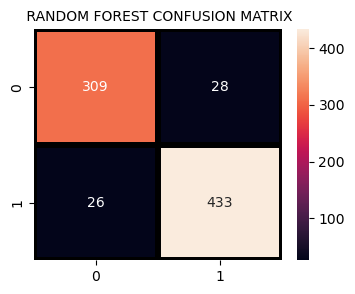

------------------------------------------------------------


In [265]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)
# Make predictions
y_pred = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))
print('-'*60)

# 500, 50, 30
print(f'Classification report for Random forest classifier with balanced data :\n {classification_report(y_pred, y_test)}')
print('-'*60)

cm = confusion_matrix(y_test, y_pred)

# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

# Calculate sensitivity (true positive rate)
rf_accuracy = accuracy_score(y_test, y_pred)
sensitivity = TP / (TP + FN)
rf_recall = TP / (TP + FN)
rf_precision = TP / (TP + FP)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)

    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=10)
plt.show()
print('-'*60)